# step 0: import

In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()


#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# step 1: Read the data

In [11]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [12]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [15]:
df = pd.read_csv('Meta.csv')

In [45]:
df.head(10)

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


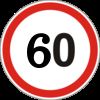

In [17]:
# Read an Image
img = Image.open('Meta/3.png')
#Convert into RGB image
img.convert('RGB')

# step 2:clean the data

## most_common_used_color

In [19]:
# Import Module
from PIL import Image
 
def most_common_used_color(img):
    # Get width and height of Image
    width, height = img.size
 
    # Initialize Variable
    r_total = 0
    g_total = 0
    b_total = 0
 
    count = 0
 
    # Iterate through each pixel
    for x in range(0, width):
        for y in range(0, height):
            # r,g,b value of pixel
            r, g, b = img.getpixel((x, y))
 
            r_total += r
            g_total += g
            b_total += b
            count += 1
 
    return (r_total/count, g_total/count, b_total/count)
 
# Read Image
img = Image.open('Meta/3.png')
 
# Convert Image into RGB
img = img.convert('RGB')
 
# call function
common_color = most_common_used_color(img)
 
print(common_color)
# Output is (R, G, B) 
print("most common used color is :RED")

(172.6477, 134.6504, 132.7923)
most common used color is :RED


## number of images per class¶

In [20]:
# Understand the data
print("Training Set:", len(X_train))
print("Test Set:", len(y_test))
#print("Validation Set:", len(X_valid))
print("Image Dimensions:", np.shape(X_train[1]))
print("Number of classes:", len(np.unique(y_train)))
n_classes = len(np.unique(y_train))

Training Set: 31367
Test Set: 7842
Image Dimensions: (30, 30, 3)
Number of classes: 2


## Visualize 1st Image in Training Set

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


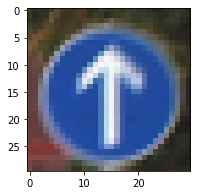

In [27]:
image = X_train[7]

plt.figure(figsize=(3,3))
plt.imshow(image)
print(y_train[0])

## pixel normalization 1st image

In [28]:
# pixel normalization 
from numpy import asarray
from PIL import Image
# load image
image = Image.open('Meta/15.png')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


# step 3: EDA

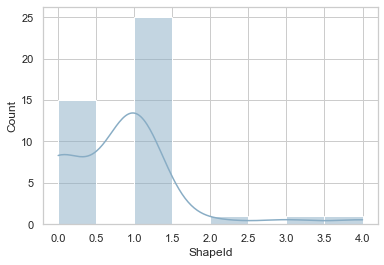

In [34]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="twilight")
sns.histplot(x = 'ShapeId', data = df, kde=True);

# Step 4:Build a CNN model

In [39]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
epochs = 5
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
491/491 [==============================] - 100s 202ms/step - loss: 2.3015 - accuracy: 0.4699 - val_loss: 0.4663 - val_accuracy: 0.8981
Epoch 2/5
491/491 [==============================] - 99s 202ms/step - loss: 0.5341 - accuracy: 0.8540 - val_loss: 0.1260 - val_accuracy: 0.9679
Epoch 3/5
491/491 [==============================] - 102s 208ms/step - loss: 0.2848 - accuracy: 0.9223 - val_loss: 0.0746 - val_accuracy: 0.9814
Epoch 4/5
491/491 [==============================] - 102s 207ms/step - loss: 0.2031 - accuracy: 0.9458 - val_loss: 0.0568 - val_accuracy: 0.9872
Epoch 5/5
491/491 [==============================] - 99s 202ms/step - loss: 0.1632 - accuracy: 0.9555 - val_loss: 0.0375 - val_accuracy: 0.9911


In [41]:
model.save("my_model.h5")

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

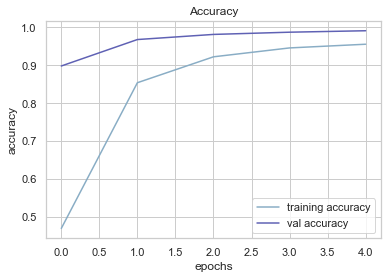

In [43]:
#plotting graphs for accuracy  
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

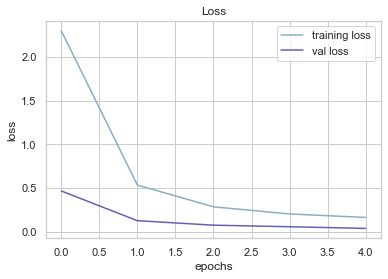

In [44]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# step 4: testing accuracy on test dataset

In [46]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

predict_X=model.predict(X_test)
classes_X=np.argmax(predict_X,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,classes_X))

0.9604908946951702


In [47]:
model.save('traffic_classifier.h5')

In [ ]:
# as we see the model reached close to 98% accuracy on the test set 